Saving face detection.webp to face detection.webp
Number of faces detected: 6
Feature vector shape: (6, 4356)

Face-wise feature comparison (Euclidean Distance):
Distance between Face 1 and Face 2: 7.58
Distance between Face 1 and Face 3: 8.49
Distance between Face 1 and Face 4: 6.86
Distance between Face 1 and Face 5: 7.63
Distance between Face 1 and Face 6: 7.53
Distance between Face 2 and Face 3: 7.62
Distance between Face 2 and Face 4: 6.83
Distance between Face 2 and Face 5: 7.30
Distance between Face 2 and Face 6: 6.97
Distance between Face 3 and Face 4: 8.59
Distance between Face 3 and Face 5: 8.20
Distance between Face 3 and Face 6: 7.12
Distance between Face 4 and Face 5: 7.17
Distance between Face 4 and Face 6: 7.40
Distance between Face 5 and Face 6: 7.54


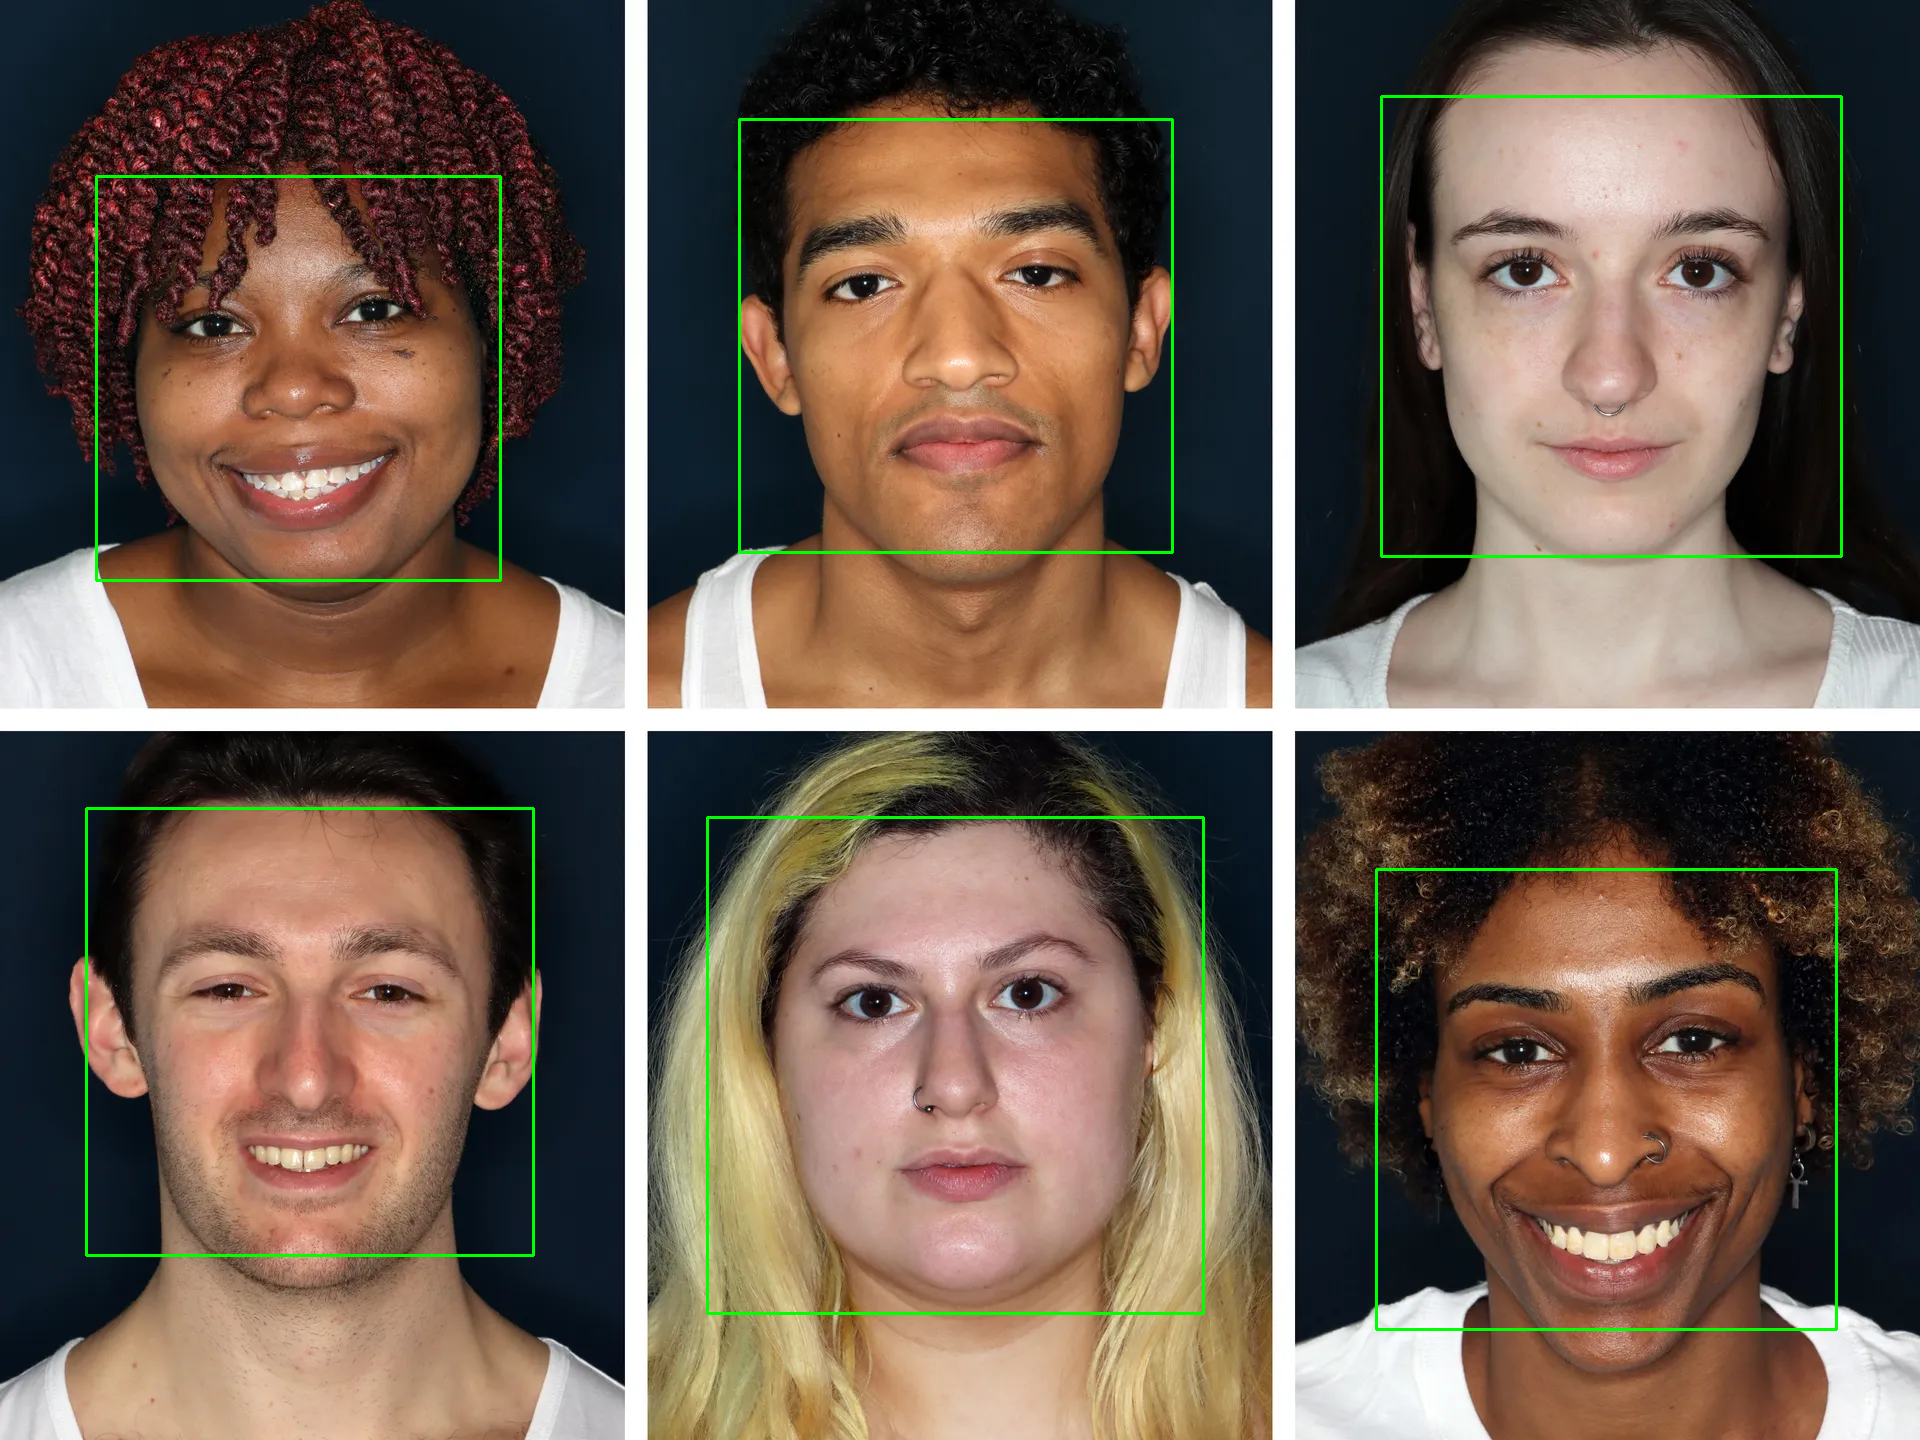

In [1]:

!pip install opencv-python scikit-image

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from skimage.feature import hog


uploaded = files.upload()
image_path = list(uploaded.keys())[0]


face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)


image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)


features = []


for i, (x, y, w, h) in enumerate(faces):

    face = gray[y:y+h, x:x+w]


    face_resized = cv2.resize(face, (100, 100))


    hog_features = hog(
        face_resized,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        orientations=9,
        block_norm='L2-Hys'
    )

    features.append(hog_features)


    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


features = np.array(features)


print("Number of faces detected:", len(faces))
print("Feature vector shape:", features.shape)


if len(features) > 1:
    print("\nFace-wise feature comparison (Euclidean Distance):")
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            distance = np.linalg.norm(features[i] - features[j])
            print(f"Distance between Face {i+1} and Face {j+1}: {distance:.2f}")


cv2_imshow(image)
